# Курс аналитик данных на Python
## Модуль 6.1 Введение в статистику

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Введение

<b>Content Columns</b>

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [39]:
df = pd.read_csv('../data/insurance.csv')

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
list(df['age'].values)  # Список значений возраста

In [ ]:
sorted(list(df['age'].values))  # Сортированный список значений возраста

Вариационный ряд - последовательность, полученная в результате расположения в порядке неубывания исходной последовательности независимых одинаково распределённых случайных величин. 

In [43]:
df['groups_age'] = pd.cut(df['age'],10)  # Сгруппируем данные на 10 групп

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges,groups_age
0,19,female,27.900,0,yes,southwest,16884.92400,"(17.954, 22.6]"
1,18,male,33.770,1,no,southeast,1725.55230,"(17.954, 22.6]"
2,28,male,33.000,3,no,southeast,4449.46200,"(27.2, 31.8]"
3,33,male,22.705,0,no,northwest,21984.47061,"(31.8, 36.4]"
4,32,male,28.880,0,no,northwest,3866.85520,"(31.8, 36.4]"


In [45]:
df['groups_age'].unique()  # Список уникальных интервалов

[(17.954, 22.6], (27.2, 31.8], (31.8, 36.4], (45.6, 50.2], (36.4, 41.0], (59.4, 64.0], (22.6, 27.2], (54.8, 59.4], (50.2, 54.8], (41.0, 45.6]]
Categories (10, interval[float64, right]): [(17.954, 22.6] < (22.6, 27.2] < (27.2, 31.8] < (31.8, 36.4] ... (45.6, 50.2] < (50.2, 54.8] < (54.8, 59.4] < (59.4, 64.0]]

In [46]:
df['groups_age'].value_counts().sort_index()  # Посчитаем кол-во наблюдений в каждой группе

(17.954, 22.6]    222
(22.6, 27.2]      140
(27.2, 31.8]      109
(31.8, 36.4]      128
(36.4, 41.0]      129
(41.0, 45.6]      110
(45.6, 50.2]      144
(50.2, 54.8]      114
(54.8, 59.4]      128
(59.4, 64.0]      114
Name: groups_age, dtype: int64

<Axes: >

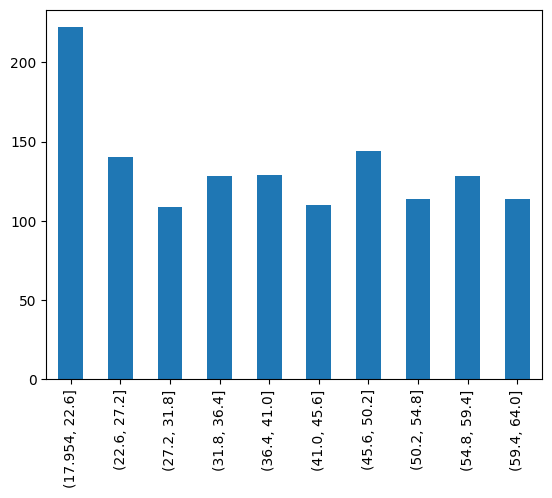

In [47]:
pd.cut(df['age'],10).value_counts().sort_index().plot.bar()  # Построим график по количеству наблюдений

<Axes: >

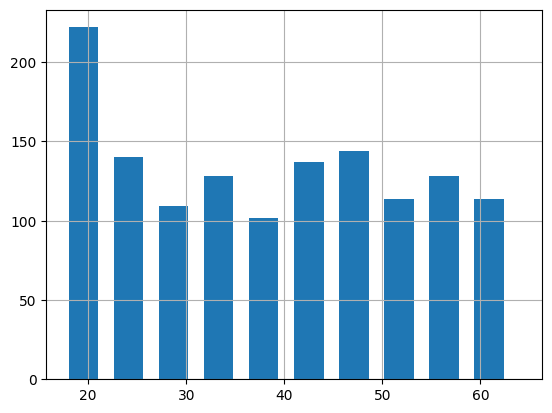

In [48]:
df['age'].hist(bins=10,width=3)  # Построим гистограмму распределения с шагом в 10

Кумулята - эмпирический аналог функции случайной величины

In [49]:
groups_df = df['groups_age'].value_counts().sort_index().reset_index()
groups_df['cum_sum'] = groups_df['groups_age'].cumsum()

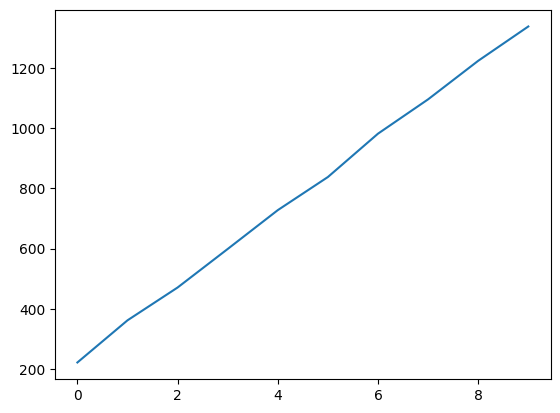

In [50]:
plt.plot(range(groups_df.shape[0]),groups_df['cum_sum']);

## Точечные оценки

<center><h2>Cредняя арифметическая</h2></center>
<center><img src="../img/mean.png" alt="hop hop loshok" width="300"></center>

<ol>
<li> Если все значения признака уменьшить (увеличить) на одну и ту же величину А, то и средняя арифметическая уменьшится (увеличится) на ту же самую величину А;</li>
<li> Если все значения признака разделить (умножить) на какое-либо постоянное число А, то средняя арифметическая уменьшится (увеличится) в А раз;</li>
<li> Средн.арифмтич. постоянной величины = этой постоянной величине</li>
<li> Средняя арифметическая отклонений наблюдений от средней арифиместической равна 0</li>
</ol>

In [51]:
df['bmi'].mean()  # bmi - индекс массы тела

30.66339686098655

In [52]:
(df['bmi'] + 10).mean()

40.663396860986545

In [53]:
(df['bmi'] * 10).mean() / df['bmi'].mean()

10.0

<center><h2>Мода</h2></center>
Мода - это наиболее часто встречающийся вариант ряда.
<center><img src="../img/moda.png" alt="hop hop loshok" width="500"></center>

In [54]:
df['age'].mode()

0    18
Name: age, dtype: int64

<center><h2>Медиана</h2></center>
Медиана - значение признака приходящееся на середину ранжированного ряда (то есть 50% наблюдений будет "слева", 50% наблюдений - "справа").

Проще говоря это середина вариационного ряда или распределения.
Если число наблюдений четное то медиана просто полусумма.

In [55]:
df['charges'].median()

9382.033

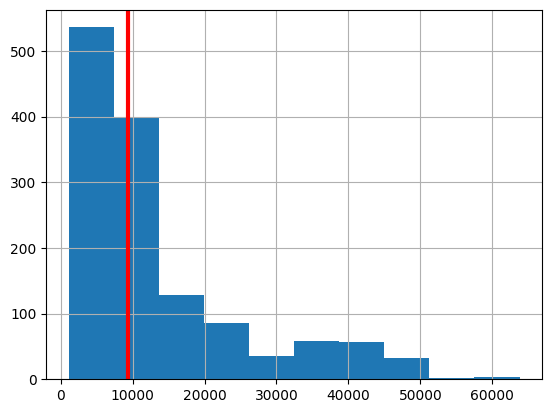

In [56]:
df['charges'].hist();
plt.axvline(x=df['charges'].median(), linewidth=3, color='red');

## Точечные оценки вариации

<center><h2>Размах</h2></center>
<center><img src="../img/razmah.png" alt="hop hop loshok" width="150"></center>

Особо не нужен и не примечателен, просто знайте что есть такая штука.

In [57]:
df['age'].max() - df['age'].min() 

46

Может использоваться в скелинге
<center><img src="../img/minmaxscaling.png" alt="hop hop loshok" width="200"></center>

In [58]:
razm = df['age'].max() - df['age'].min() 

In [59]:
((df['age'] - df['age'].min())/razm).max()

1.0

<center><h2>Среднее линейное отклонение</h2></center>
<center><img src="../img/lineynoe_otklon.jpg" alt="hop hop loshok" width="100"><center>

In [60]:
(df['bmi'] - df['bmi'].mean()).abs().mean()  # df['bmi'].mad()  # будет убрана в будущем

4.897870893576519

<center><h2> Дисперсия (среднеквадратическое) и стандартное отклонение</h2></center>
<center><img src="../img/deviation.jpg" alt="hop hop loshok" width="150">
<img src="../img/standard_deviation.jpg" alt="hop hop loshok" width="150"></center>

<ol>
<li> Дисперсия постоянной равна нулю. </li>
<li> Постоянный множитель можно выносить за знак дисперсии, возводя его в квадрат </li>
<li> Если все наблюдения увеличить (уменьшить) на одно и то же число дисперсия не изменится</li>
<li> Квадратный корень из дисперсии - это стандартное отклонение.</li> 
</ol>

In [61]:
df['some'] = 10
df.head()

,age,sex,bmi,children,smoker,region,charges,groups_age,some
0,19,female,27.900,0,yes,southwest,16884.92400,"(17.954, 22.6]",10
1,18,male,33.770,1,no,southeast,1725.55230,"(17.954, 22.6]",10
2,28,male,33.000,3,no,southeast,4449.46200,"(27.2, 31.8]",10
3,33,male,22.705,0,no,northwest,21984.47061,"(31.8, 36.4]",10
4,32,male,28.880,0,no,northwest,3866.85520,"(31.8, 36.4]",10


In [62]:
df['some'].std() ** 2  # Дисперсия постоянной равна нулю.

0.0

In [63]:
df['bmi'].std()  # стандартное отклонение.

6.098186911679014

In [64]:
df['bmi'].std() ** 2 # среднеквадратическое отклонение.

37.18788360977323

In [65]:
(df['bmi'] * 5).std() / 5

6.098186911679015